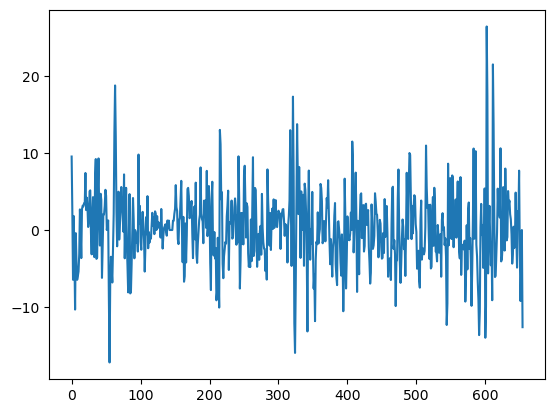

3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

datos = pd.read_csv('Session5data.csv', sep=";",decimal=",")
yy = datos.iloc[:,1]

y = yy[0:655] # leave the last 5 observations to compare with the forecasted values

plt.plot(y)
plt.show()

import sys
print(sys.version)
# version 3.9.7

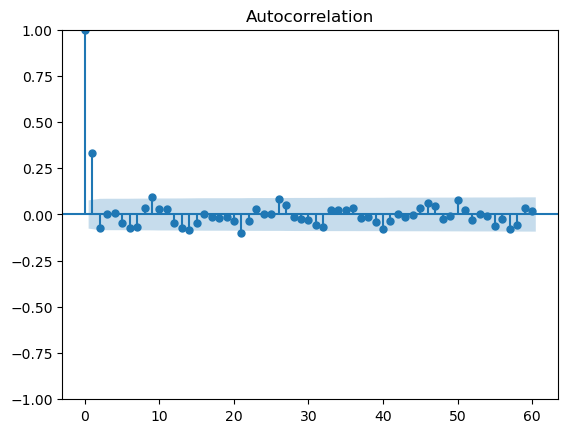

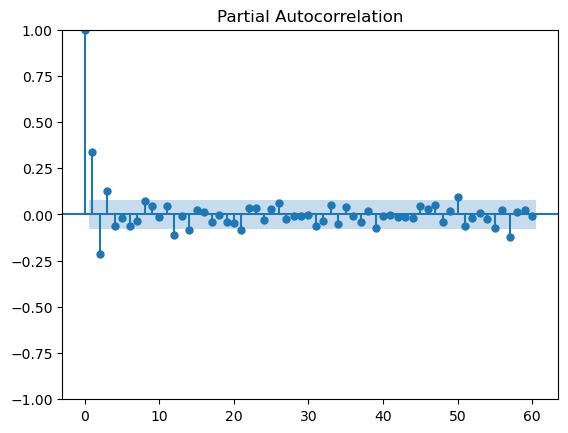

Ljung-Box: Statistic value 105.98669020022943 p-value 1.0530094116266213e-13
      lb_stat     lb_pvalue
20  105.98669  1.053009e-13


In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

nlags = 60 # play with this parameter

## Aquí si pongo 72 en nlags me da este error:
# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.
# The requested nlags 72 must be < 48.
plot_acf(y, lags = nlags)
plt.show()

plot_pacf(y, lags = nlags,method="ols")
plt.show()


box_test = sm.stats.acorr_ljungbox(y, lags=[20])
print("Ljung-Box: Statistic value", box_test.iloc[0,0], "p-value", box_test.iloc[0,1]) # first output "The test statistic", second output "p-value"

box_test = sm.stats.acorr_ljungbox(y, lags=[20])
print(box_test) # first output "The test statistic", second output "p-value"


In [3]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test for the original series
Statistic Value: -12.162065693043932
p-value: 1.4858156293415478e-22


                               SARIMAX Results                                
Dep. Variable:               Serie.MA   No. Observations:                  655
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1904.878
Date:                Tue, 10 Oct 2023   AIC                           3817.756
Time:                        10:48:10   BIC                           3835.694
Sample:                             0   HQIC                          3824.711
                                - 655                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1640      0.247      0.664      0.507      -0.320       0.648
ma.L1          0.4448      0.034     12.957      0.000       0.378       0.512
ma.L2         -0.0722      0.033     -2.210      0.0

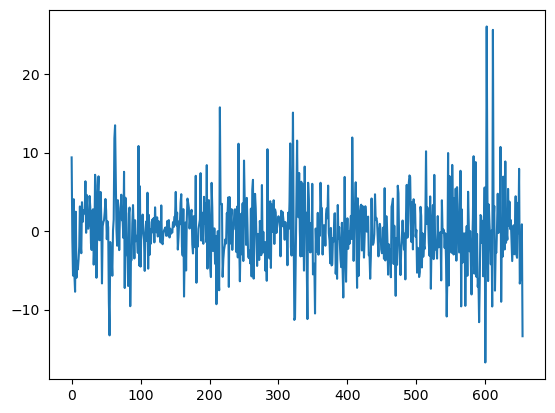

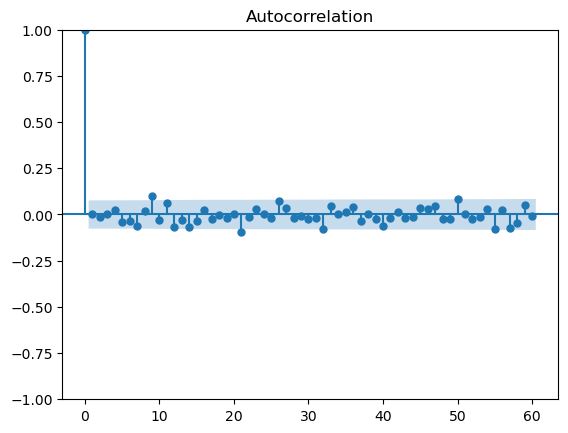

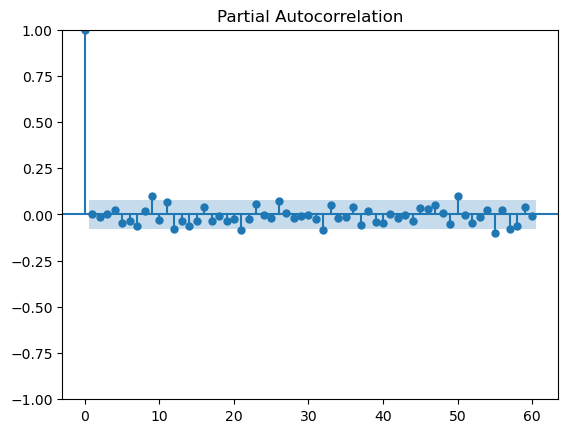

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = ARIMA(y, order = (0,0,2))
model_fit=model.fit()
print(model_fit.summary())
# print("Coefficients",fit_fit.params)

residuos=model_fit.resid

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, lags = nlags,method="ols")
plt.show()

In [5]:
adf_test = sm.tsa.stattools.adfuller(residuos,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the residuals")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test for the residuals
Statistic Value: -25.429342154422294
p-value: 0.0


Ljung-Box: Statistic value 69.4038152189489 p-value 0.16672559621290545
Shapido: Statistic value 0.9626041650772095 p-value 7.2213901525230995e-12


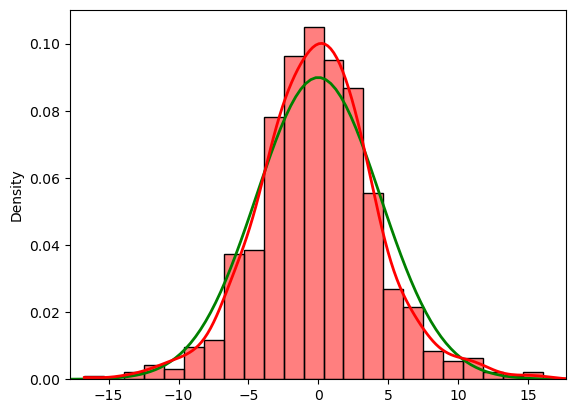

In [6]:
# Box test for autocorrelations

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[59])

print("Ljung-Box: Statistic value", box_test.iloc[0,0], "p-value", box_test.iloc[0,1]) # first output "The test statistic", second output "p-value"

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -4*sigma, mu +4*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = sns.histplot(residuos, stat="density", color = "r",
                  kde = True, line_kws={'lw': 2}, bins = 30
                   ) # NEW

# ax = plt.hist(residuos,density=True, range = (mean - 4*std, mean + 4*std), color = "r")
# ax = sns.distplot(residuos, hist = False, kde = True,
#                  kde_kws = {'linewidth': 2}, color = "blue") # OLD-DEPRECATED

ax.set_xlim(mean - 4*std, mean + 4*std)

plt.show()

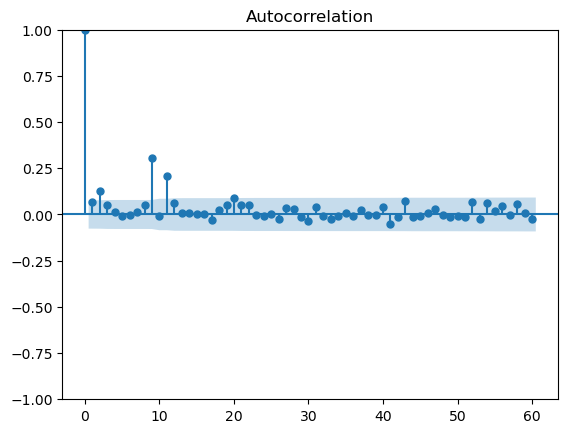

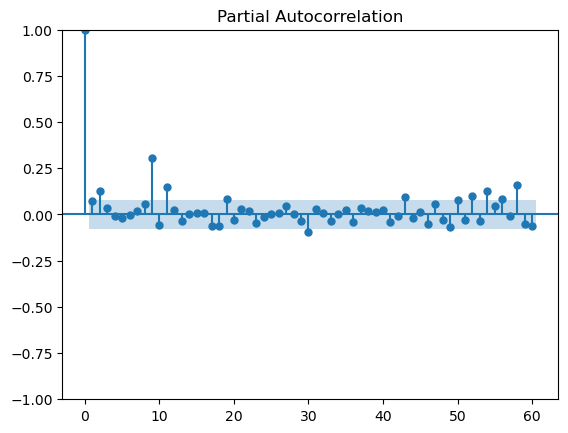

Ljung-Box for squared residuals
Statistic value 118.68829608984575 p_value 4.986070806587789e-16


In [7]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags,method="ols")
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[20])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2.iloc[0,0],"p_value",box_test2.iloc[0,1])

point predictions 
 655   -5.857407
656    1.131571
657    0.164037
658    0.164037
659    0.164037
Name: predicted_mean, dtype: float64
forecasting errors 
 655     0.952775
656   -15.744751
657    -6.875446
658   -10.955404
659    14.352092
dtype: float64


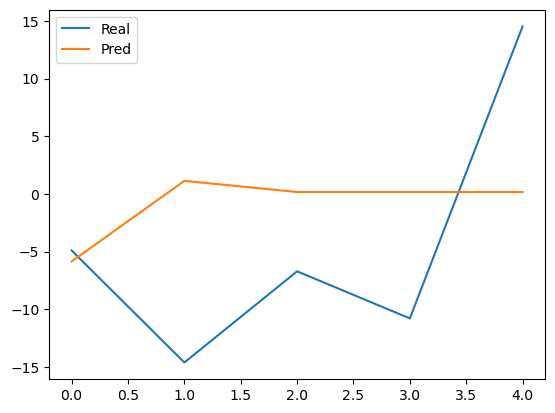

In [8]:
y_pred = model_fit.forecast(steps = 5)
res = yy[-5:] - y_pred # OUT-OF-SAMPLE
print("point predictions",'\n', y_pred)
print("forecasting errors",'\n', res)

real =yy[-5:].reset_index(drop=True)
plt.plot(real, label = 'Real')
plt.plot(y_pred.reset_index(drop=True), label = 'Pred')
plt.legend()
plt.show()

In [9]:
std = np.std(residuos)

quantile_2_5=np.quantile(residuos, 0.025)
quantile_97_5=np.quantile(residuos, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -8.425666121500512 Upper limit 97.5%: 9.236358178051079
95% confidence intervals assuming normality
Normal Percentile 2.5%: -8.69386492687201 Normal Percentile 97.5%: 8.69386492687201
